# Methodology Analysis

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("viridis")


#Load data
df = pd.read_excel('Coded_data.xlsx')

In [2]:
#=============================================================================
# INTERACTION MECHANISMS ANALYSIS
#=============================================================================

def plot_interaction_mechanisms(df):
    """Analyze interaction mechanisms distribution and relationships"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Frequency of interaction mechanisms
    interaction_counts = df['Interaction Mechanisms'].value_counts()
    
    axes[0,0].barh(range(len(interaction_counts)), interaction_counts.values, 
                 color=plt.cm.viridis(np.linspace(0, 1, len(interaction_counts))))
    axes[0,0].set_yticks(range(len(interaction_counts)))
    axes[0,0].set_yticklabels(interaction_counts.index)
    axes[0,0].set_title('Interaction Mechanisms Frequency', fontweight='bold', pad=20)
    axes[0,0].set_xlabel('Count')
    
    
    
    # Agent Design vs Interaction Mechanisms heatmap
    cross_tab1 = pd.crosstab(df['Agent Design'], df['Interaction Mechanisms'])
    sns.heatmap(cross_tab1, annot=True, cmap='viridis', ax=axes[0,1])
    axes[0,1].set_title('Agent Design × Interaction Mechanisms', fontweight='bold', pad=20)
    axes[0,1].set_xlabel('Interaction Mechanisms')
    axes[0,1].set_ylabel('Agent Design')
    
    # Financial Context vs Interaction Mechanisms
    cross_tab2 = pd.crosstab(df['Financial Context'], df['Interaction Mechanisms'])
    
    cross_tab2.plot(kind='bar', stacked=True, ax=axes[1,0], 
                    color=plt.cm.Set3(np.linspace(0, 1, len(cross_tab2.columns))),
                    alpha=0.8, edgecolor='white', linewidth=1)
    
    axes[1,0].set_title('Financial Context by Interaction Mechanisms', fontweight='bold', pad=20)
    axes[1,0].set_xlabel('Financial Context', fontweight='medium')
    axes[1,0].set_ylabel('Number of Studies', fontweight='medium')
    axes[1,0].legend(title='Interaction Mechanisms', bbox_to_anchor=(1, 1), loc='upper right')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Interaction mechanisms by domain
    domain_interaction = pd.crosstab(df['Sustainable Finance Domain'], 
                                   df['Interaction Mechanisms'], normalize='index') * 100
    sns.heatmap(domain_interaction, annot=True, fmt='.1f', cmap='viridis', ax=axes[1,1])
    axes[1,1].set_title('Domain Distribution\n(% within Domain)', fontweight='bold', pad=20)
    axes[1,1].set_xlabel('Interaction Mechanisms')
    axes[1,1].set_ylabel('Sustainable Finance Domain')
    
    plt.tight_layout()
    plt.savefig("mthd1.png", dpi=300, bbox_inches="tight")
    plt.show()
    

In [3]:
#=============================================================================
#  NETWORK STRUCTURE ANALYSIS
#=============================================================================

def plot_network_structure_analysis(df):
    """Analyze network structure patterns"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
   
    # Network structure distribution
    network_counts = df['Network Structure'].value_counts()
    colors = plt.cm.Set2(np.linspace(0, 1, len(network_counts)))
    wedges, texts, autotexts = axes[0,0].pie(network_counts.values, 
                                      labels=network_counts.index,
                                      autopct='%1.1f%%',
                                      colors=colors,
                                      startangle=90,
                                      pctdistance=0.85,
                                      wedgeprops=dict(width=0.6, edgecolor='white', linewidth=2))
    
    # Enhance text formatting
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    
    axes[0,0].set_title('Network Structure\nDistribution', fontweight='bold', pad=20)
    
    ## Agent Design vs Network Structure
    cross_tab3 = pd.crosstab(df['Agent Design'], df['Network Structure'])
    sns.heatmap(cross_tab3, annot=True, cmap='plasma', ax=axes[0,1])
    axes[0,1].set_title('Agent Design × Network Structure', fontweight='bold', pad=20)
    axes[0,1].set_xlabel('Network Structure')
    axes[0,1].set_ylabel('Agent Design')
    
    # Financial Context vs Network Structure
    cross_tab4 = pd.crosstab(df['Financial Context'], df['Network Structure'])
    sns.heatmap(cross_tab4, annot=True, cmap='plasma', ax=axes[1,0])
    axes[1,0].set_title('Financial Context × Network Structure', fontweight='bold', pad=20)
    axes[1,0].set_xlabel('Network Structure')
    axes[1,0].set_ylabel('Financial Context')
    
    ## Time Horizon vs Network Structure
    cross_tab5 = pd.crosstab(df['Time Horizon'], df['Network Structure'])
    # Color palettes
    colors_primary = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
    # Convert to bubble chart format
    y_pos = np.arange(len(cross_tab5.index))
    for i, col in enumerate(cross_tab5.columns):
        x_pos = [i] * len(cross_tab5.index)
        sizes = cross_tab5[col].values * 100
        axes[1,1].scatter(x_pos, y_pos, s=sizes, alpha=0.7, 
                   color=colors_primary[i % len(colors_primary)], 
                   edgecolors='white', linewidth=2, label=col)
        
        # Add value labels
        for j, val in enumerate(cross_tab5[col].values):
            if val > 0:
                axes[1,1].text(i, j, str(val), ha='center', va='center', 
                        fontweight='bold', color='white', fontsize=9)
    
    axes[1,1].set_title('Time Horizon ×\nNetwork Structure', fontweight='bold', pad=20)
    axes[1,1].set_xlabel('Network Structure', fontweight='medium')
    axes[1,1].set_ylabel('Time Horizon', fontweight='medium')
    axes[1,1].set_xticks(range(len(cross_tab5.columns)))
    axes[1,1].set_xticklabels(cross_tab5.columns, rotation=45, ha='right')
    axes[1,1].set_yticks(range(len(cross_tab5.index)))
    axes[1,1].set_yticklabels(cross_tab5.index)
    
    plt.tight_layout()
    plt.savefig("mthd2.png", dpi=300, bbox_inches="tight")
    plt.show()


In [4]:
#=============================================================================
# METHODOLOGICAL APPROACH ANALYSIS
#=============================================================================
def plot_methodological_approaches(df):
    """Sophisticated methodological approaches analysis"""
    
    fig = plt.figure(figsize=(12, 9))
    gs = fig.add_gridspec(3, 3, hspace=0.8, wspace=0.8)
    
    ## Enhanced horizontal bar with gradients
    ax1 = fig.add_subplot(gs[0, :2])
    method_counts = df['Methodological Approach'].value_counts()
    
    # Create gradient colors
    colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(method_counts)))
    bars = ax1.barh(range(len(method_counts)), method_counts.values,
                    color=colors, alpha=0.8, edgecolor='white', linewidth=1.5)
    
    ax1.set_yticks(range(len(method_counts)))
    ax1.set_yticklabels(method_counts.index, fontweight='medium')
    ax1.set_title('Distribution of Methodological Approaches', fontweight='bold', pad=20)
    ax1.set_xlabel('Number of Studies', fontweight='medium')
    
    # Enhanced value labels
    for i, v in enumerate(method_counts.values):
        ax1.text(v + max(method_counts.values) * 0.02, i, f'{v} ({v/len(df)*100:.1f}%)', 
                va='center', ha='left', fontweight='bold', color='#2c3e50')
    
    ## Enhanced domain heatmap with clustering
    ax2 = fig.add_subplot(gs[1, :])
    cross_tab6 = pd.crosstab(df['Sustainable Finance Domain'], 
                            df['Methodological Approach'], normalize='index') * 100
    
    sns.heatmap(cross_tab6, annot=True, fmt='.1f', cmap='RdYlBu_r', ax=ax2,
                cbar_kws={'shrink': 0.6, 'label': 'Percentage within Domain (%)'},
                linewidths=0.5, linecolor='white',
                annot_kws={'fontweight': 'medium', 'size': 9})
    
    ax2.set_title('Methodological Approaches by Sustainable Finance Domain', fontweight='bold', pad=20)
    ax2.set_xlabel('Methodological Approach', fontweight='medium')
    ax2.set_ylabel('Sustainable Finance Domain', fontweight='medium')
    
    ## Tool relationship network-style visualization
    ax3 = fig.add_subplot(gs[2, :])
    cross_tab7 = pd.crosstab(df['ABM Tool Used'], df['Methodological Approach'])
    
    ## Create a grouped bar chart
    x = np.arange(len(cross_tab7.index))
    width = 0.8 / len(cross_tab7.columns)
    
    for i, col in enumerate(cross_tab7.columns):
        bars = ax3.bar(x + i * width, cross_tab7[col], width, 
                      label=col, alpha=0.8,
                      color=plt.cm.tab10(i / len(cross_tab7.columns)),
                      edgecolor='white', linewidth=1)
        
        # Add pattern for distinction
        if i % 2 == 0:
            for bar in bars:
                bar.set_hatch('//')
    
    ax3.set_title('ABM Tools × Methodological Approaches', fontweight='bold', pad=20)
    ax3.set_xlabel('ABM Tool Used', fontweight='medium')
    ax3.set_ylabel('Number of Studies', fontweight='medium')
    ax3.set_xticks(x + width * (len(cross_tab7.columns) - 1) / 2)
    ax3.set_xticklabels(cross_tab7.index, rotation=45, ha='right')
    ax3.legend(title='Methodological Approach', ncol=1, 
              bbox_to_anchor=(1, 1), loc='upper right')
    
    plt.tight_layout()
    plt.savefig("mthd3.png", dpi=300, bbox_inches="tight",
                facecolor='white', edgecolor='none')
    plt.show()

In [5]:
#=============================================================================
# COMPREHENSIVE METHODOLOGY MATRIX
#=============================================================================

def create_methodology_matrix(df):
    """Create sophisticated 3D methodology analysis"""
    
    # Create combination columns
    df['Method_Combo'] = (df['Agent Design'] + ' | ' + 
                         df['Interaction Mechanisms'] + ' | ' + 
                         df['Network Structure'])
    
    combo_counts = df['Method_Combo'].value_counts().head(5)
    
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3, height_ratios=[1, 1.2])
    
    
    ## Enhanced methodology combinations
    ax1 = fig.add_subplot(gs[0, :])
    
    # Create a sophisticated horizontal bar chart
    y_pos = np.arange(len(combo_counts))
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(combo_counts)))
    
    bars = ax1.barh(y_pos, combo_counts.values, color=colors, alpha=0.8,
                    edgecolor='white', linewidth=2)
    
    # Add gradient effect to bars
    for i, bar in enumerate(bars):
        bar.set_height(0.8)
    
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels([label.replace(' | ', '\n') for label in combo_counts.index], 
                       fontsize=9, fontweight='medium')
    ax1.set_title('Top 5 Integrated Methodology Patterns\n(Agent Design | Interaction | Network)', 
                  fontweight='bold', pad=20)
    ax1.set_xlabel('Frequency of Usage', fontweight='medium')
    
    # Value labels with percentages
    for i, v in enumerate(combo_counts.values):
        percentage = (v/len(df))*100
        ax1.text(v + max(combo_counts.values) * 0.02, i, 
                f'{v} ({percentage:.1f}%)', 
                va='center', ha='left', fontweight='bold', color='#2c3e50')
    
    ## multi-dimensional analysis
    ax2 = fig.add_subplot(gs[1, 0])
    multi_dim = df.groupby(['Agent Design', 'Interaction Mechanisms', 'Network Structure']).size().reset_index(name='count')
    multi_dim['Combined'] = (multi_dim['Agent Design'] + ' + ' + 
                           multi_dim['Interaction Mechanisms'])
    
    pivot_multi = multi_dim.pivot(index='Combined', 
                                 columns='Network Structure', 
                                 values='count').fillna(0)
    
    # Create a heatmap
    sns.heatmap(pivot_multi, annot=True, fmt='g', cmap='RdYlBu_r', ax=ax2,
                cbar_kws={'shrink': 0.8, 'label': 'Number of Studies'},
                linewidths=1, linecolor='white',
                annot_kws={'fontweight': 'bold', 'size': 8})
    
    ax2.set_title('Multi-Dimensional Methodology Matrix\nAgent Design + Interaction × Network Structure', 
                  fontweight='bold', pad=15)
    ax2.set_xlabel('Network Structure', fontweight='medium')
    ax2.set_ylabel('Agent Design + Interaction Mechanisms', fontweight='medium')
    
    ## Methodology complexity radar chart
    ax3 = fig.add_subplot(gs[1, 1], projection='polar')
    
    # Calculate complexity metrics
    complexity_metrics = {
        'Agent Heterogeneity': df['Agent Design'].nunique(),
        'Interaction Variety': df['Interaction Mechanisms'].nunique(),
        'Network Diversity': df['Network Structure'].nunique(),
        'Temporal Scope': df['Time Horizon'].nunique(),
        'Validation Rigor': df['Validation Method'].nunique(),
        'Tool Sophistication': df['ABM Tool Used'].nunique()
    }
    
    # Normalize values
    max_val = max(complexity_metrics.values())
    normalized_values = [v/max_val for v in complexity_metrics.values()]
    
    # Create radar chart
    angles = np.linspace(0, 2*np.pi, len(complexity_metrics), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
    values = normalized_values + [normalized_values[0]]  # Complete the circle
    
    ax3.plot(angles, values, 'o-', linewidth=3, color='#3498db', alpha=0.8)
    ax3.fill(angles, values, alpha=0.25, color='#3498db')
    
    ax3.set_xticks(angles[:-1])
    ax3.set_xticklabels(list(complexity_metrics.keys()), fontweight='medium')
    ax3.set_title('Methodology Complexity\nRadar Analysis', 
                  fontweight='bold', pad=20)
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig("mthd4.png", dpi=300, bbox_inches="tight",
                facecolor='white', edgecolor='none')
    plt.show()
    
    return combo_counts

In [6]:
#=============================================================================
# TIME HORIZON ANALYSIS
#=============================================================================

def plot_time_horizon_analysis(df):
    """Time horizon analysis"""
    
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(2, 2, hspace=0.8, wspace=0.7)
    
    ## donut chart with better styling
    ax1 = fig.add_subplot(gs[0, 0])
    time_counts = df['Time Horizon'].value_counts()
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'][:len(time_counts)]
    wedges, texts, autotexts = ax1.pie(time_counts.values, labels=time_counts.index, 
                                      autopct='%1.1f%%', startangle=90, pctdistance=0.85,
                                      colors=colors, wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2))
    
    #text formatting
    for autotext in autotexts:
        autotext.set_color('black')
        #autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    
    ax1.set_title('Time Horizon Distribution', fontweight='bold', pad=20)
    
   
    ## Domain vs Time Horizon heatmap
    ax2 = fig.add_subplot(gs[0, 1])
    cross_tab9 = pd.crosstab(df['Sustainable Finance Domain'], df['Time Horizon'])
    
    sns.heatmap(cross_tab9, annot=True, cmap='Blues', ax=ax2,
                cbar_kws={'shrink': 0.8}, fmt='d',
                linewidths=1, linecolor='white',
                annot_kws={'fontweight': 'bold'})
    
    ax2.set_title('Domain × Time Horizon', fontweight='bold', pad=15)
    ax2.set_xlabel('Time Horizon', fontweight='medium')
    ax2.set_ylabel('Domain', fontweight='medium')

     ## Agent Design vs Time Horizon
    ax3 = fig.add_subplot(gs[1, :])
    cross_tab8 = pd.crosstab(df['Agent Design'], df['Time Horizon'])
    
    # Create stacked percentage bar chart
    cross_tab8_pct = cross_tab8.div(cross_tab8.sum(axis=1), axis=0) * 100
    cross_tab8_pct.plot(kind='barh', stacked=True, ax=ax3, 
                        color=colors[:len(cross_tab8_pct.columns)],
                        alpha=0.8, edgecolor='black', linewidth=1)
    
    ax3.set_title('Agent Design by Time Horizon (Percentage Distribution)', 
                  fontweight='bold', pad=20)
    ax3.set_xlabel('Percentage (%)', fontweight='medium')
    ax3.set_ylabel('Agent Design', fontweight='medium')
    ax3.legend(title='Time Horizon', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig("mthd5.png", dpi=300, bbox_inches="tight",
                facecolor='white', edgecolor='none')
    plt.show()

In [7]:
#=============================================================================
# TOOL-METHODOLOGY ALIGNMENT
#=============================================================================

def plot_tool_methodology_alignment(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    ## ABM Tool distribution
    tool_counts = df['ABM Tool Used'].value_counts()
    
    axes[0,0].bar(range(len(tool_counts)), tool_counts.values,
                  color=plt.cm.Set2(np.linspace(0, 1, len(tool_counts))))
    axes[0,0].set_xticks(range(len(tool_counts)))
    axes[0,0].set_xticklabels(tool_counts.index, rotation=45, ha='right')
    axes[0,0].set_title('ABM Tools Distribution', fontweight='bold', pad=20)
    axes[0,0].set_ylabel('Count')
    
    # Add value labels
    for i, v in enumerate(tool_counts.values):
        axes[0,0].text(i, v + 0.1, str(v), ha='center', va='bottom')
    
    ## Tool vs Methodological Approach
    cross_tab10 = pd.crosstab(df['ABM Tool Used'], 
                             df['Methodological Approach'], normalize='index') * 100
    sns.heatmap(cross_tab10, annot=True, fmt='.1f', cmap='coolwarm', ax=axes[0,1])
    axes[0,1].set_title('ABM Tool × Methodological Approach (%)', fontweight='bold', pad=20)
    axes[0,1].set_xlabel('Methodological Approach')
    axes[0,1].set_ylabel('ABM Tool Used')
    
    ## Tool vs Agent Design
    cross_tab11 = pd.crosstab(df['ABM Tool Used'], df['Agent Design'])
    sns.heatmap(cross_tab11, annot=True, cmap='coolwarm', ax=axes[1,0])
    axes[1,0].set_title('ABM Tool × Agent Design', fontweight='bold', pad=20)
    axes[1,0].set_xlabel('Agent Design')
    axes[1,0].set_ylabel('ABM Tool Used')
    
    ## Tool complexity analysis (by counting non-null methodological features)
    df['Methodology_Complexity'] = (
        df[['Agent Design', 'Interaction Mechanisms', 'Network Structure', 
            'Validation Method']].notna().sum
        (axis=1)
    )
    
    tool_complexity = df.groupby('ABM Tool Used')['Methodology_Complexity'].mean()
    
    axes[1,1].bar(range(len(tool_complexity)), tool_complexity.values,
                  color=plt.cm.viridis(np.linspace(0, 1, len(tool_complexity))))
    axes[1,1].set_xticks(range(len(tool_complexity)))
    axes[1,1].set_xticklabels(tool_complexity.index, rotation=45, ha='right')
    axes[1,1].set_title('Average Methodology Complexity by Tool', fontweight='bold', pad=20)
    axes[1,1].set_ylabel('Complexity Score')
    
    # Add value labels
    for i, v in enumerate(tool_complexity.values):
        axes[1,1].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig("mthd6.png", dpi=300, bbox_inches="tight",
                facecolor='white', edgecolor='none')
    plt.show()

In [8]:
#=============================================================================
# VALIDATION ROBUSTNESS ANALYSIS
#=============================================================================

def plot_validation_analysis(df):
    """Analyze validation methods"""
    
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(2, 2, hspace=0.6, wspace=0.5, height_ratios=[1, 1.2])

    ## Validation method frequency
    ax1 = fig.add_subplot(gs[0, 0])
    validation_counts = df['Validation Method'].value_counts()
    
    ax1.barh(range(len(validation_counts)), validation_counts.values,
                   color=plt.cm.viridis(np.linspace(0, 1, len(validation_counts))))
    ax1.set_yticks(range(len(validation_counts)))
    ax1.set_yticklabels(validation_counts.index)
    ax1.set_title('Validation Methods Frequency', fontweight='bold', pad=20)
    ax1.set_xlabel('Count')
    
    # Add value labels
    for i, v in enumerate(validation_counts.values):
        ax1.text(v + 0.1, i, str(v), va='center', ha='left')
   
    
    # Validation Method vs Agent Design
    ax2 = fig.add_subplot(gs[0, 1])
    cross_tab12 = pd.crosstab(df['Agent Design'], df['Validation Method'], normalize='index') * 100
    sns.heatmap(cross_tab12, annot=True, fmt='.1f', cmap='RdBu_r', ax=ax2)
    ax2.set_title('Agent Design × Validation Method (%)', fontweight='bold', pad=20)
    ax2.set_xlabel('Validation Method')
    ax2.set_ylabel('Agent Design')

    # Multi-validation approach analysis
    ax3 = fig.add_subplot(gs[1, :])
    
    df['Multi_Validation'] = df['Validation Method'].str.strip().eq('Mixed')
    multi_val_counts = df['Multi_Validation'].value_counts().reindex([False, True], fill_value=0)
    multi_val_counts.index = ['Single Validation', 'Multiple Validation']
    
    ax3.pie(multi_val_counts.values, labels=multi_val_counts.index, 
                  autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
    ax3.set_title('Single vs Multiple Validation Approaches', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig("mthd7.png", dpi=300, bbox_inches="tight",
                facecolor='white', edgecolor='none')
    plt.show()

In [9]:
#=============================================================================
# SUMMARY STATISTICS FUNCTION
#=============================================================================

def generate_methodology_summary(df):
    """Generate comprehensive methodology summary statistics"""
    
    print("="*60)
    print("COMPREHENSIVE METHODOLOGY ANALYSIS SUMMARY")
    print("="*60)
    
    print(f"\nDataset Overview:")
    print(f"- Total papers analyzed: {len(df)}")
    print(f"- Year range: {df['Year'].min()} - {df['Year'].max()}")
    print(f"- Unique domains: {df['Sustainable Finance Domain'].nunique()}")
    
    print(f"\nAgent Design Distribution:")
    for design, count in df['Agent Design'].value_counts().items():
        percentage = (count/len(df))*100
        print(f"- {design}: {count} papers ({percentage:.1f}%)")
    
    print(f"\nInteraction Mechanisms:")
    for mechanism, count in df['Interaction Mechanisms'].value_counts().items():
        percentage = (count/len(df))*100
        print(f"- {mechanism}: {count} papers ({percentage:.1f}%)")
    
    print(f"\nNetwork Structures:")
    for network, count in df['Network Structure'].value_counts().items():
        percentage = (count/len(df))*100
        print(f"- {network}: {count} papers ({percentage:.1f}%)")
    
    print(f"\nMethodological Approaches:")
    for method, count in df['Methodological Approach'].value_counts().items():
        percentage = (count/len(df))*100
        print(f"- {method}: {count} papers ({percentage:.1f}%)")
    
    print(f"\nValidation Methods:")
    for validation, count in df['Validation Method'].value_counts().items():
        percentage = (count/len(df))*100
        print(f"- {validation}: {count} papers ({percentage:.1f}%)")
    
    print(f"\nABM Tools:")
    for tool, count in df['ABM Tool Used'].value_counts().items():
        percentage = (count/len(df))*100
        print(f"- {tool}: {count} papers ({percentage:.1f}%)")

In [10]:
#=============================================================================
# MAIN EXECUTION FUNCTION
#=============================================================================

def run_complete_analysis(df):
    """Run all analyses in a sequence"""
    
    print("Starting Comprehensive ABM Methodology Analysis")
    print("="*60)
    
    # Generate summary statistics
    generate_methodology_summary(df)
    
    print("\n" + "="*60)
    print("GENERATING VISUALIZATIONS")
    print("="*60)
    
    # Run all plot functions
    print("\n Analyzing Interaction Mechanisms")
    plot_interaction_mechanisms(df)
    
    print("\n Analyzing Network Structures")
    plot_network_structure_analysis(df)
    
    print("\n Analyzing Methodological Approaches")
    plot_methodological_approaches(df)
    
    print("\n Creating Comprehensive Methodology Matrix")
    combo_counts = create_methodology_matrix(df)
    
    print("\n Analyzing Time Horizons")
    plot_time_horizon_analysis(df)
    
    print("\n Analyzing Tool-Methodology Alignment")
    plot_tool_methodology_alignment(df)
    
    print("\n Analyzing Validation Robustness")
    plot_validation_analysis(df)

    
    return combo_counts

Starting Comprehensive ABM Methodology Analysis
COMPREHENSIVE METHODOLOGY ANALYSIS SUMMARY

Dataset Overview:
- Total papers analyzed: 45
- Year range: 2010 - 2025
- Unique domains: 6

Agent Design Distribution:
- Mixed: 18 papers (40.0%)
- Bounded Rational: 13 papers (28.9%)
- Rational: 8 papers (17.8%)
- Adaptive: 5 papers (11.1%)
- Behavioral: 1 papers (2.2%)

Interaction Mechanisms:
- Mixed: 22 papers (48.9%)
- Market-based: 17 papers (37.8%)
- Network: 3 papers (6.7%)
- Direct: 3 papers (6.7%)

Network Structures:
-  Structured: 17 papers (37.8%)
- Random: 5 papers (11.1%)
- Mixed: 4 papers (8.9%)
- Scale-free: 3 papers (6.7%)
- Grid: 3 papers (6.7%)
- Complete: 3 papers (6.7%)
- Small-world: 1 papers (2.2%)

Methodological Approaches:
- Pure ABM: 25 papers (55.6%)
- Hybrid ABM: 14 papers (31.1%)
- Theoretical Framework: 6 papers (13.3%)

Validation Methods:
- Stylized_facts: 18 papers (40.0%)
-  Empirical : 11 papers (24.4%)
- Expert validation: 4 papers (8.9%)
- Mixed: 3 papers 

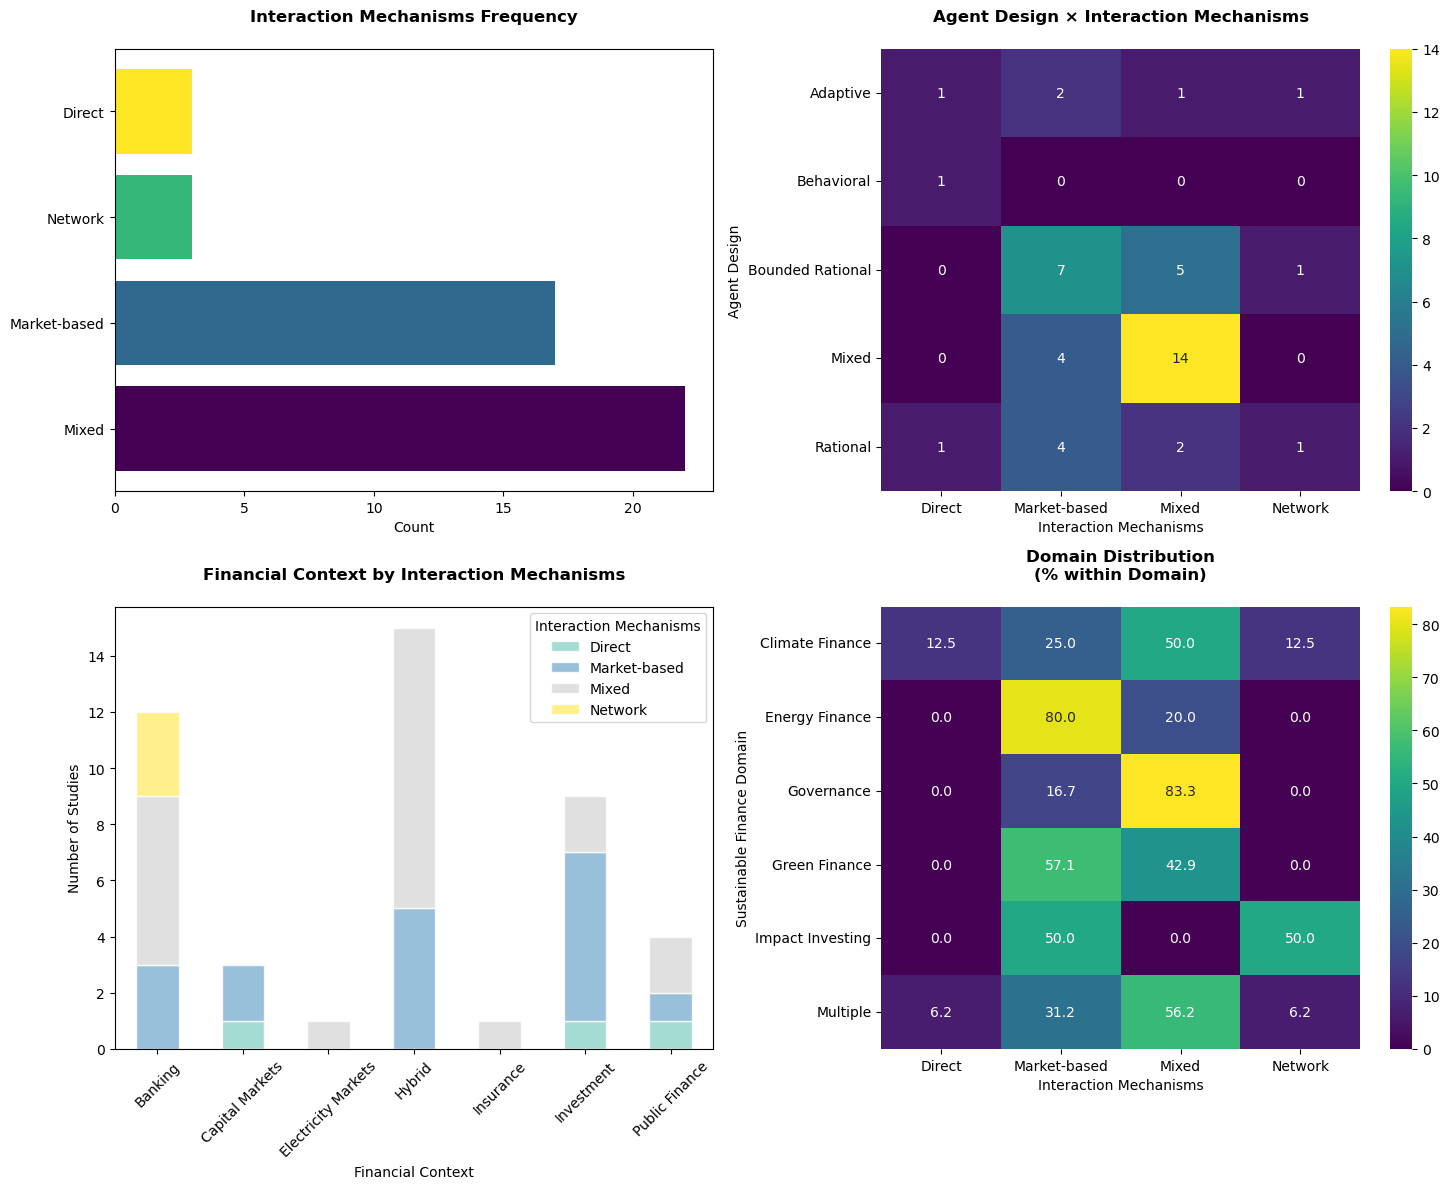


 Analyzing Network Structures


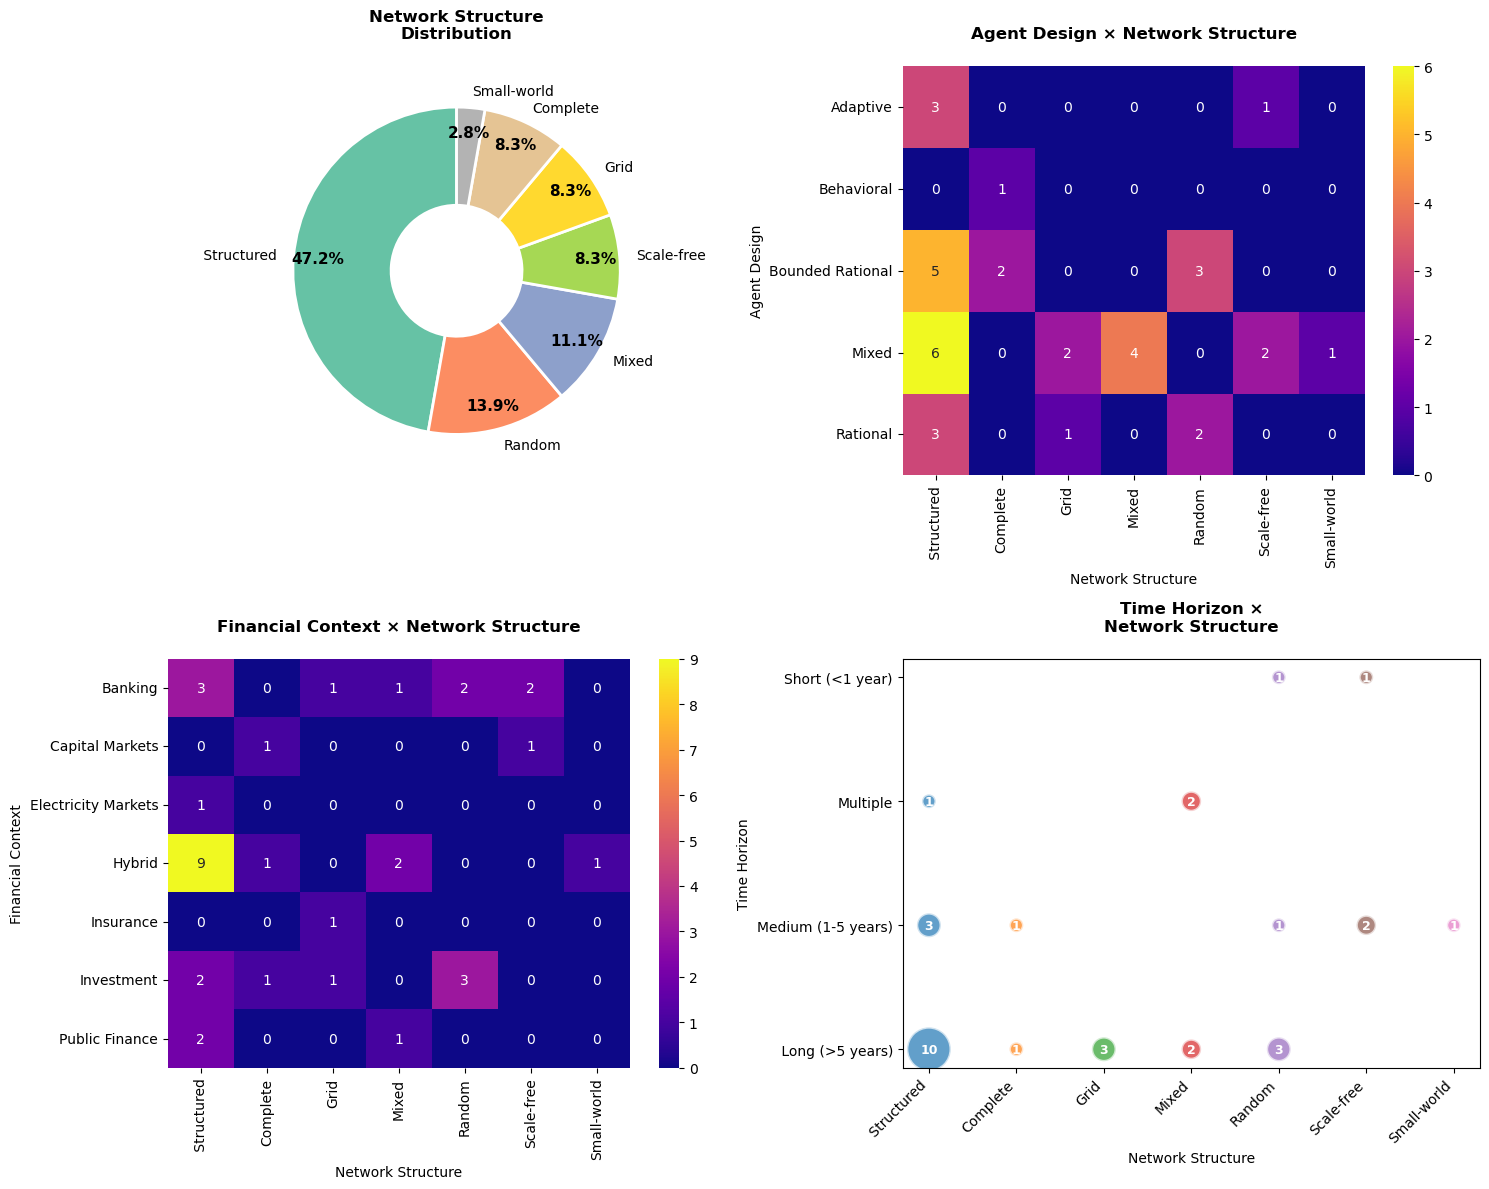


 Analyzing Methodological Approaches


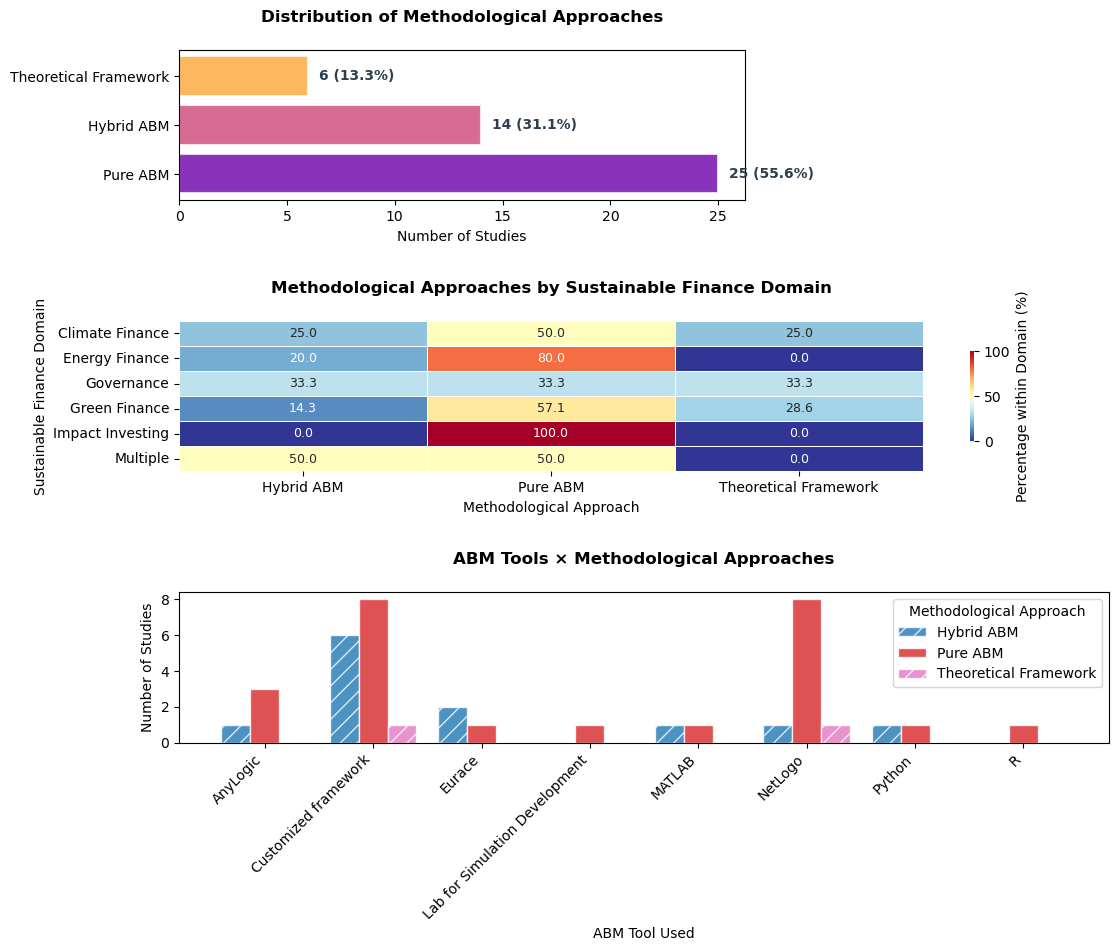


 Creating Comprehensive Methodology Matrix


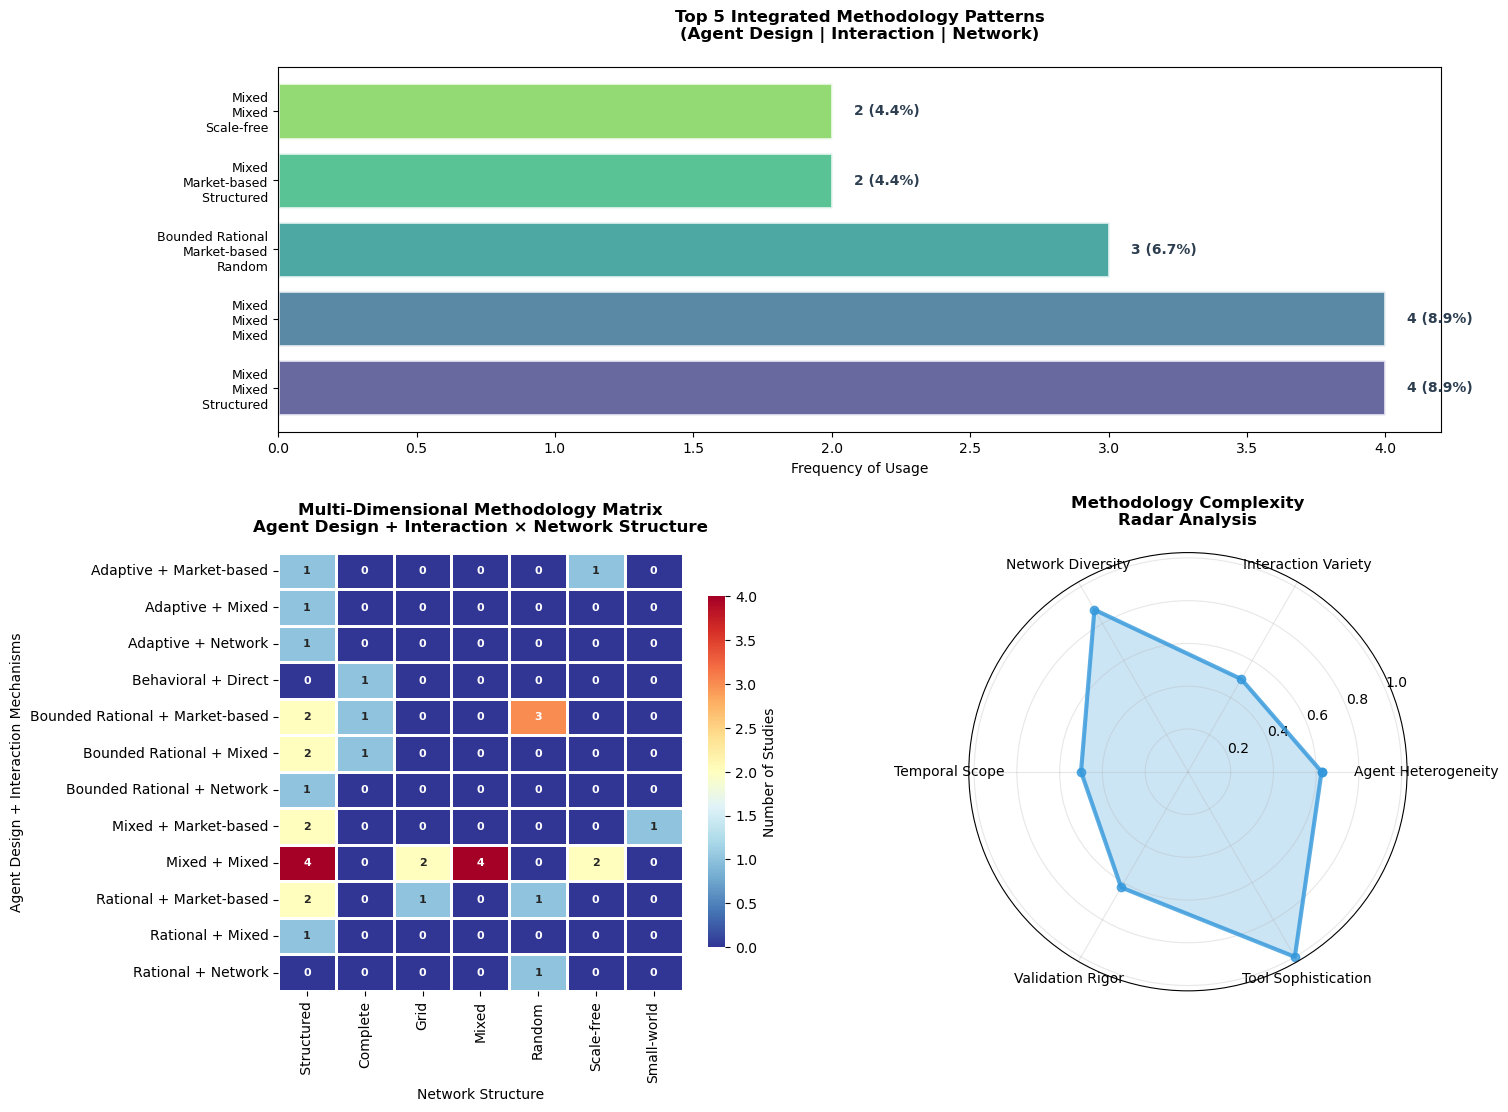


 Analyzing Time Horizons


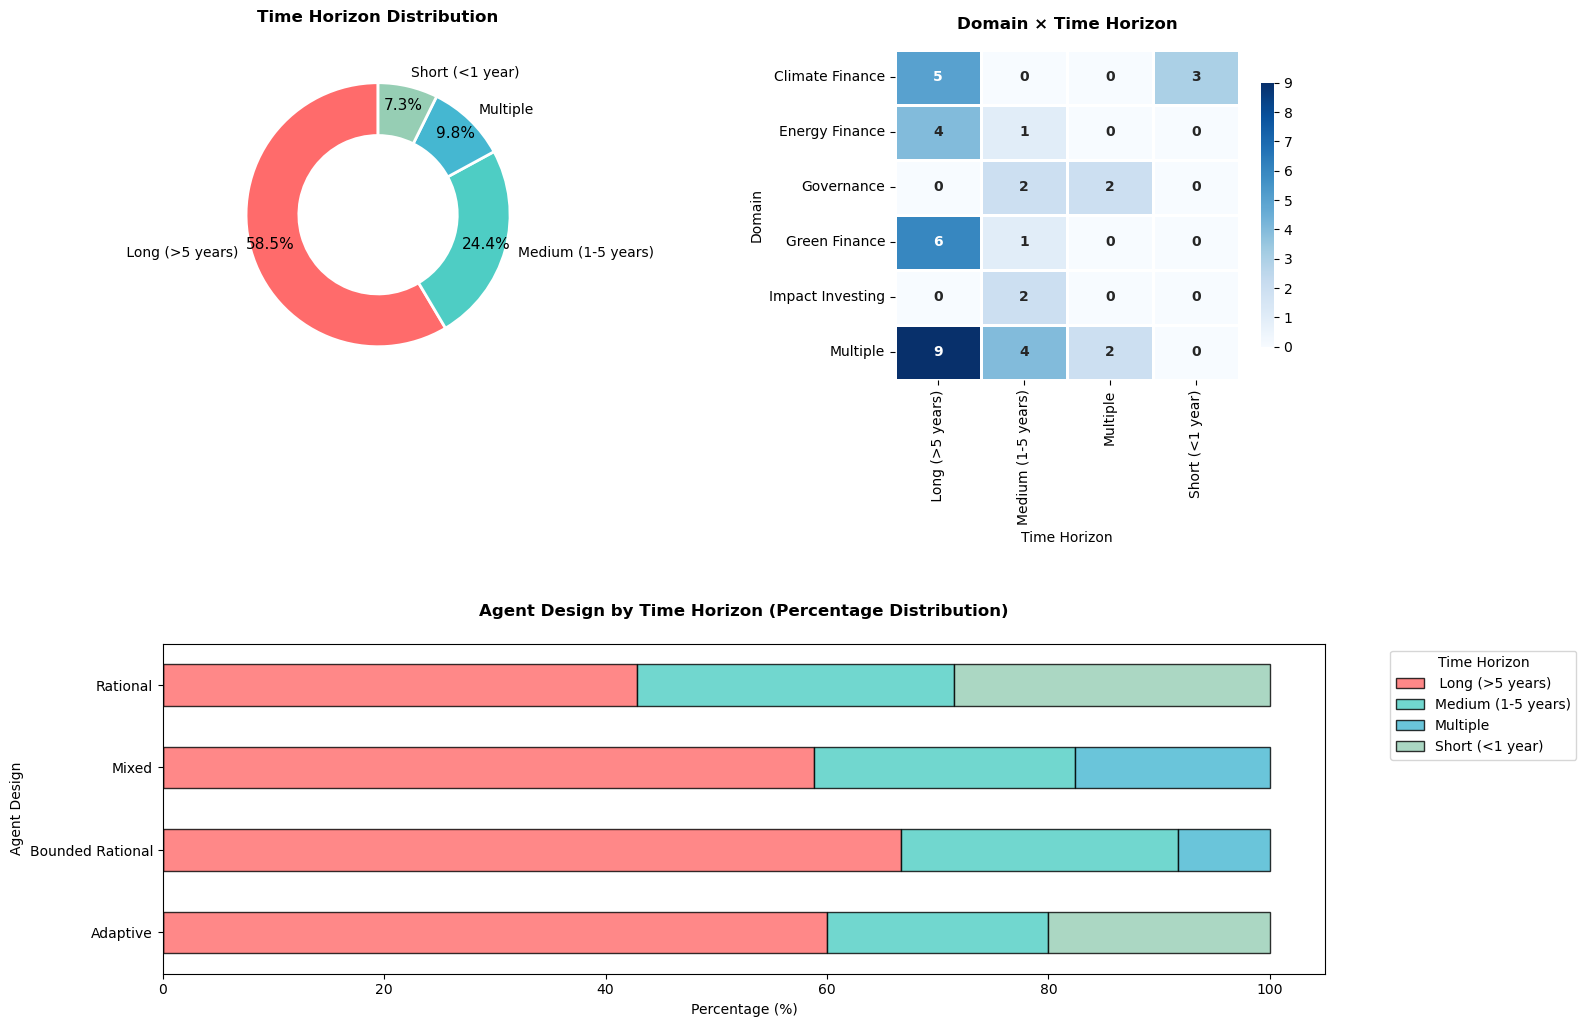


 Analyzing Tool-Methodology Alignment


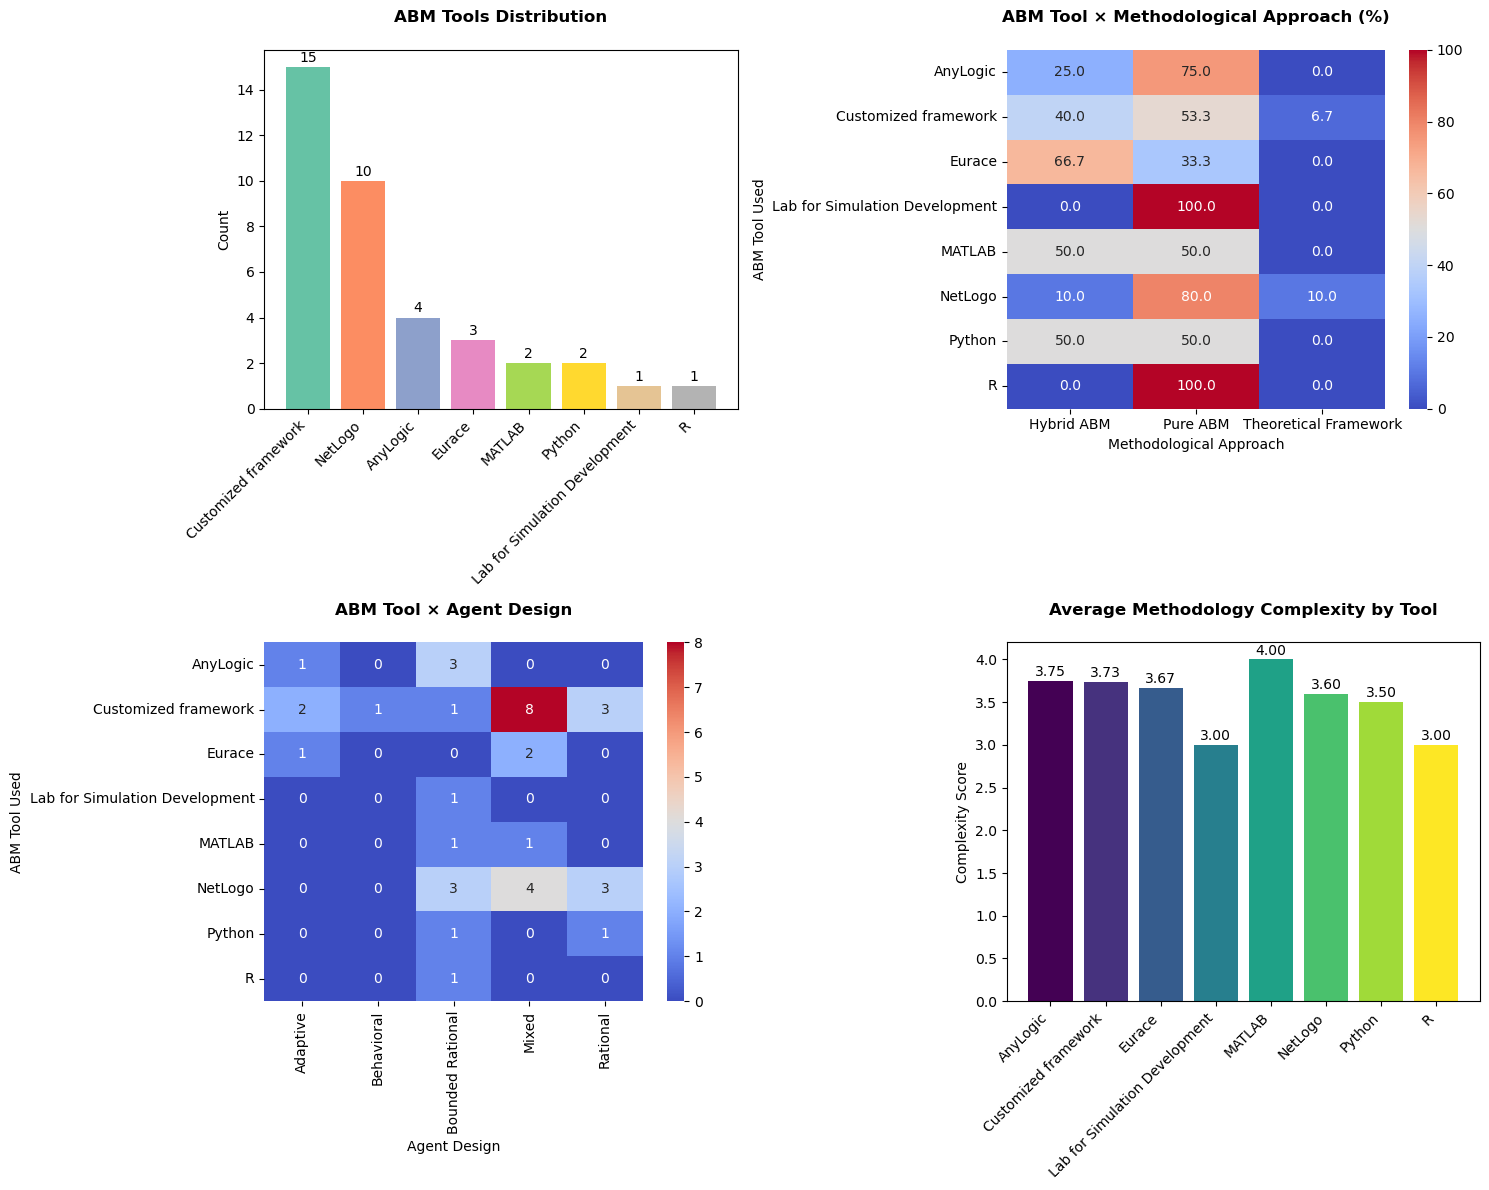


 Analyzing Validation Robustness


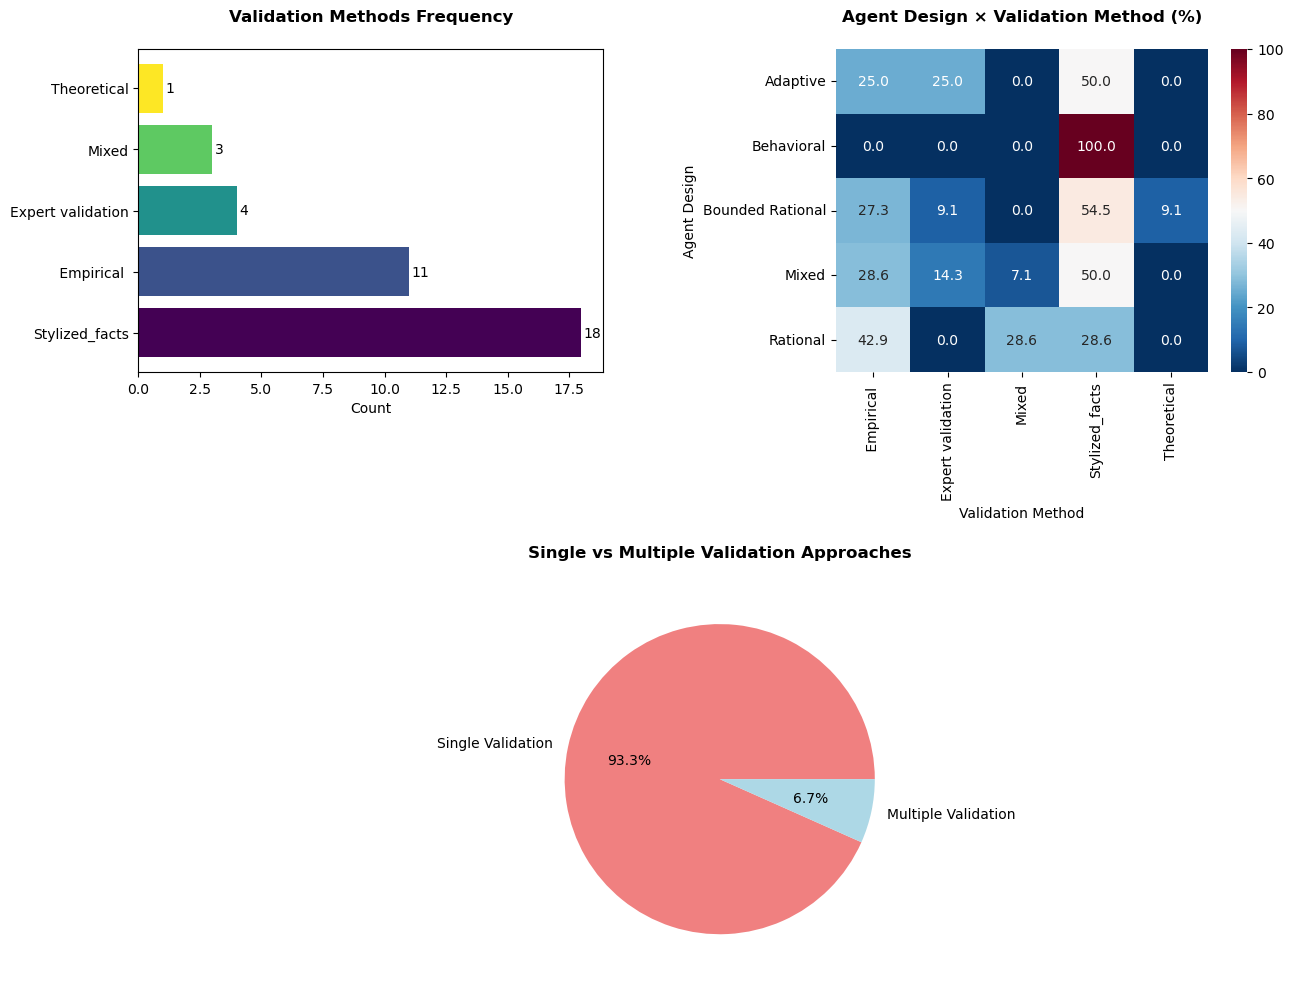

In [11]:
# Run complete analysis
methodology_combinations = run_complete_analysis(df)

## Quality score analysis

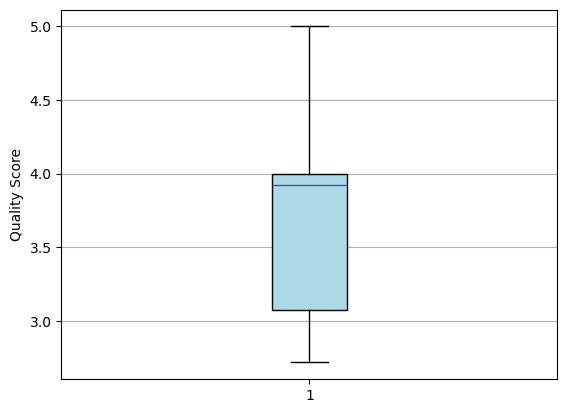

In [12]:
quality_scores = df['Quality Score']
plt.boxplot(quality_scores, patch_artist=True, boxprops=dict(facecolor='lightblue'))
#plt.title('Quality Scores of Studies')
plt.ylabel('Quality Score')
plt.grid(axis='y')
plt.savefig("mthd8.png", dpi=300, bbox_inches="tight")
plt.show()

In [13]:
# Calculate IQR, Q1, Q3, minimum, and maximum
Q1 = np.percentile(quality_scores, 25)
Q3 = np.percentile(quality_scores, 75)
IQR = Q3 - Q1
minimum = np.min(quality_scores)
maximum = np.max(quality_scores)
median = np.median(quality_scores)

# Create DataFrame for the results
data = {
    "Statistic": ["Q1 (25th Percentile)", "Q3 (75th Percentile)", "IQR", "Minimum", "Maximum", "Median"],
    "Value": [Q1, Q3, IQR, minimum, maximum, median]
}

iqr_table = pd.DataFrame(data)

# Display the table
print(iqr_table)

              Statistic     Value
0  Q1 (25th Percentile)  3.073772
1  Q3 (75th Percentile)  4.000000
2                   IQR  0.926228
3               Minimum  2.717161
4               Maximum  5.000000
5                Median  3.926228
